In [8]:
import torch
import os
import pickle
import json

## Resultados

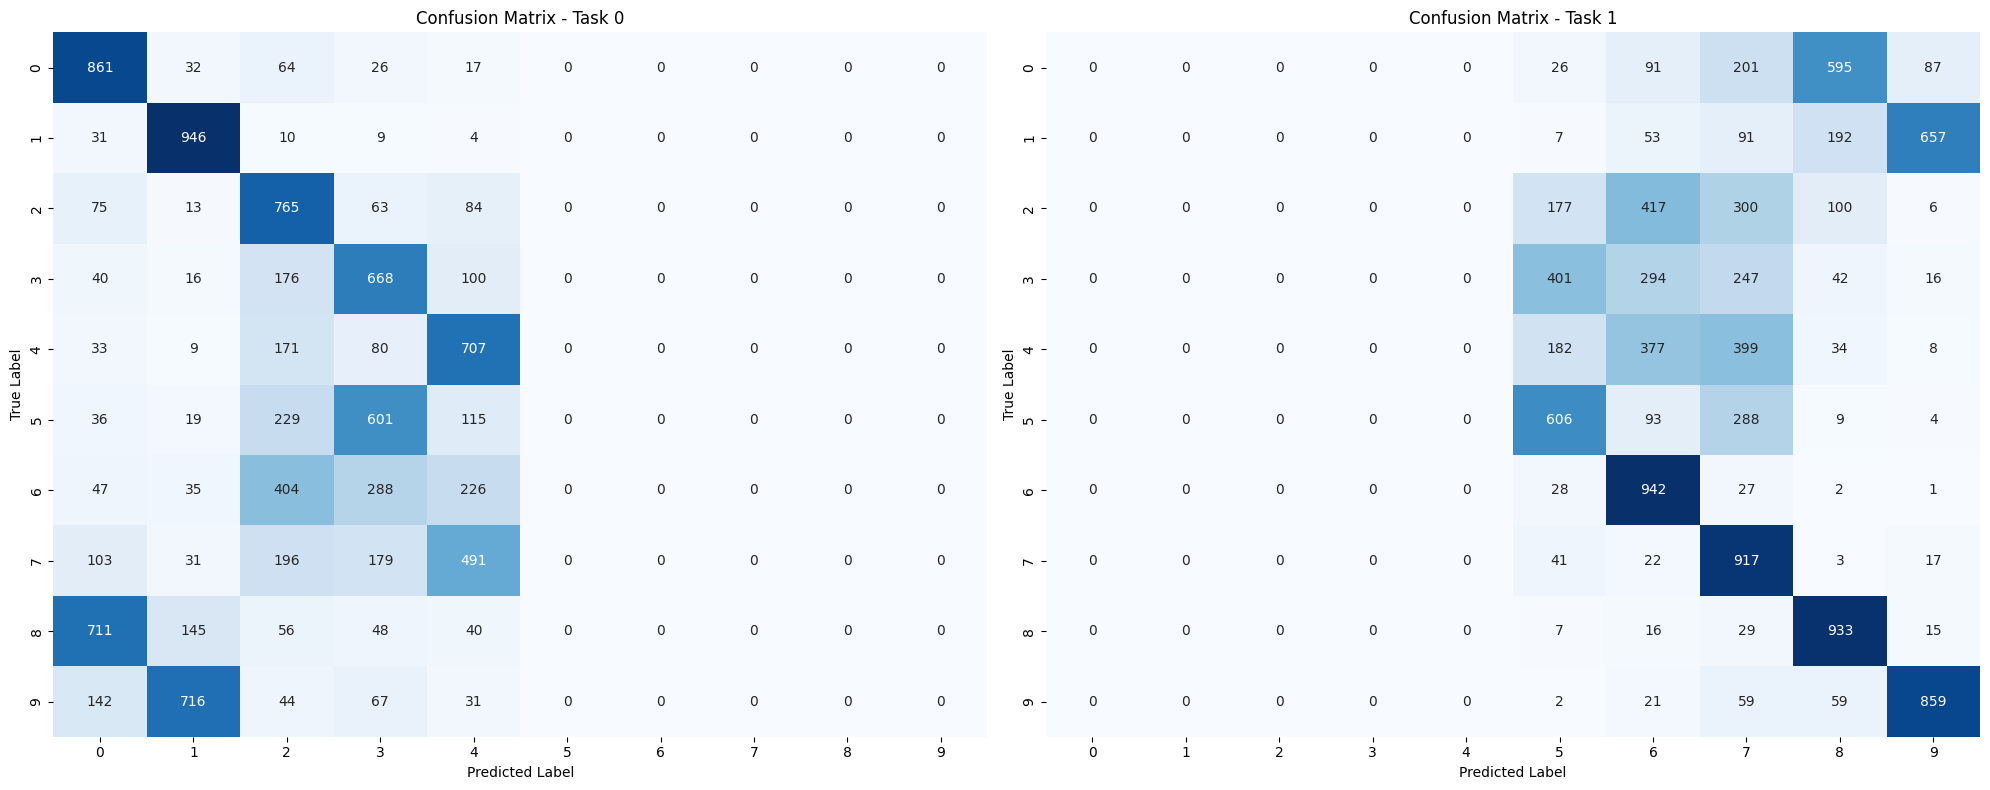

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

# Cargar los datos de los archivos pickle
with open('results_task0.pkl', 'rb') as file:
    result_task0 = pickle.load(file)

with open('results_task1.pkl', 'rb') as file:
    result_task1 = pickle.load(file)

# Crear figura y ejes para los subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot para result_task0
plt.sca(axes[0])
sns.heatmap(result_task0['econf'], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Task 0')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plot para result_task1
plt.sca(axes[1])
sns.heatmap(result_task1['econf'], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Task 1')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Ajustar el diseño de los subplots
plt.tight_layout()
plt.show()


## Norma de los pesos 

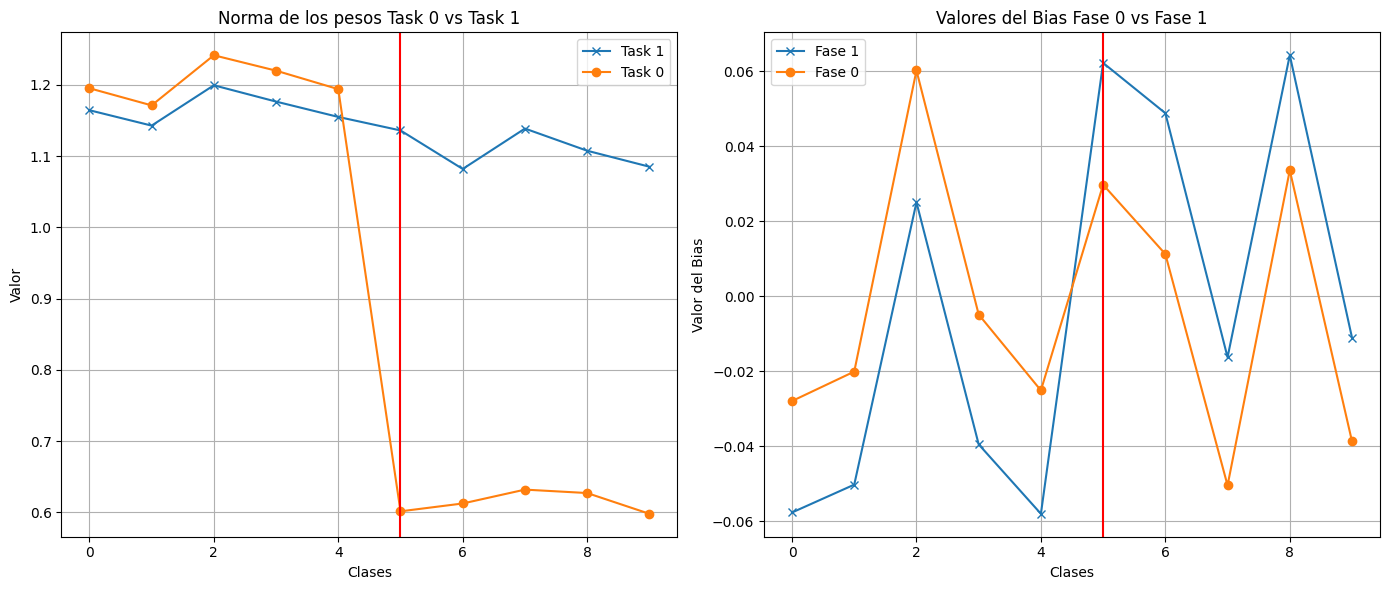

In [10]:
import torch
import matplotlib.pyplot as plt
from pprint import pprint

fase_0 = torch.load("w0.pth")
fase_1 = torch.load("w1.pth")

wn_f1 = [(indice, torch.norm(row)) for indice, row in enumerate(fase_1["fc.weight"])]
bias_f1 = [(indice, row) for indice, row in enumerate(fase_1["fc.bias"])]

wn_f0 = [(indice, torch.norm(row)) for indice, row in enumerate(fase_0["fc.weight"])]
bias_f0 = [(indice, row) for indice, row in enumerate(fase_0["fc.bias"])]

# Convertir los datos en listas separadas para x e y
x_f1_w = [item[0] for item in wn_f1]
y_f1_w = [item[1].item() for item in wn_f1]  # Convertir los tensores a valores numéricos

x_f0_w = [item[0] for item in wn_f0]
y_f0_w = [item[1].item() for item in wn_f0]  # Convertir los tensores a valores numéricos

# Convertir los datos en listas separadas para x e y (bias)
x_f1_b = [item[0] for item in bias_f1]
y_f1_b = [item[1].item() for item in bias_f1]  # Convertir los tensores a valores numéricos

x_f0_b = [item[0] for item in bias_f0]
y_f0_b = [item[1].item() for item in bias_f0]  # Convertir los tensores a valores numéricos

# Crear los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Graficar las normas de los pesos
ax1.plot(x_f1_w, y_f1_w, marker='x', linestyle='-', label='Task 1')
ax1.plot(x_f0_w, y_f0_w, marker='o', linestyle='-', label='Task 0')
ax1.set_xlabel('Clases')
ax1.set_ylabel('Valor')
ax1.set_title('Norma de los pesos Task 0 vs Task 1')
ax1.grid(True)
ax1.axvline(5, color='r')
ax1.legend()

# Graficar los valores del bias
ax2.plot(x_f1_b, y_f1_b, marker='x', linestyle='-', label='Fase 1')
ax2.plot(x_f0_b, y_f0_b, marker='o', linestyle='-', label='Fase 0')
ax2.set_xlabel('Clases')
ax2.set_ylabel('Valor del Bias')
ax2.set_title('Valores del Bias Fase 0 vs Fase 1')
ax2.grid(True)
ax2.axvline(5, color='r')
ax2.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

## Flujo de los gradientes del clasificador

[]

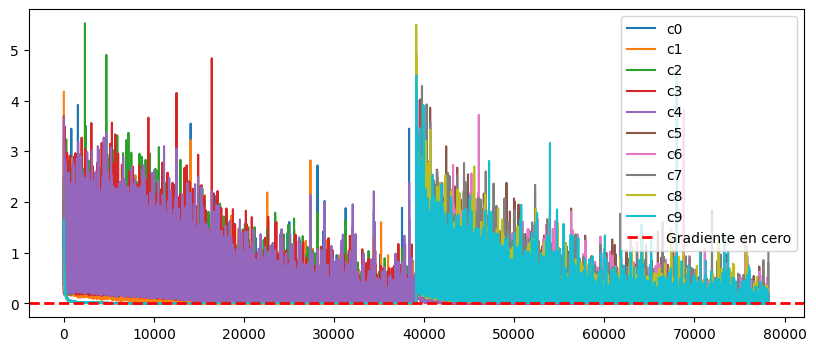

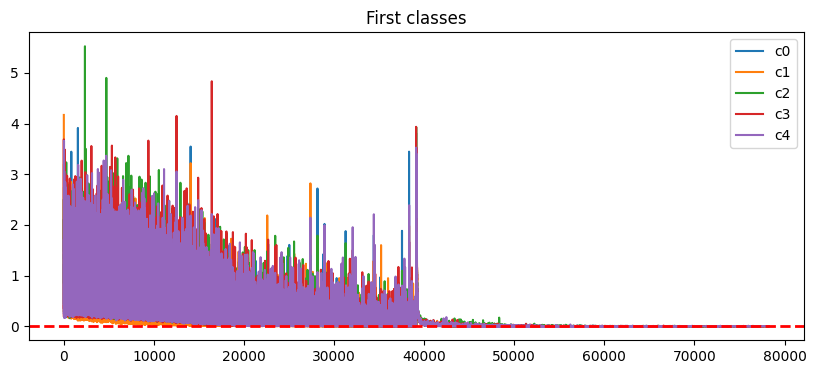

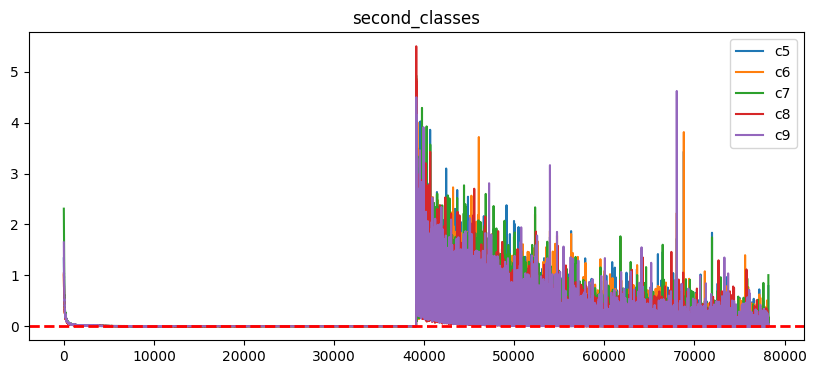

In [11]:
import pickle

# Leer el objeto desde el archivo pkl
with open('gradients.pkl', 'rb') as file:
    grad = pickle.load(file)
    
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i, g in enumerate(grad):
    plt.plot(g, label=f"c{i}")
plt.axhline(0, color='red', linewidth=2, linestyle='--', label='Gradiente en cero') 
plt.legend()

plt.figure(figsize=(10, 4))
for i in range(5):
    g = grad[i]
    plt.plot(g, label=f"c{i}")
plt.legend()
plt.title("First classes")
plt.axhline(0, color='red', linewidth=2, linestyle='--', label='Gradiente en cero')  
plt.plot()

plt.figure(figsize=(10, 4))
for i in range(5, 10):
    g = grad[i]
    plt.plot(g, label=f"c{i}")
plt.title("second_classes")
plt.legend()
plt.axhline(0, color='red', linewidth=2, linestyle='--', label='Gradiente en cero')  
plt.plot()

### Similaridad de las representaciones

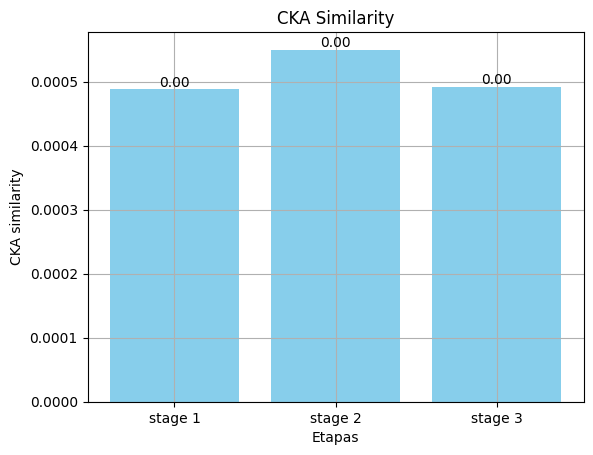

In [12]:
import json
import matplotlib.pyplot as plt

# Cargamos los datos desde el archivo JSON
with open('sims.json') as archivo:
    datos = json.load(archivo)

# Extraemos los valores de linear_CKA
linear = datos["linear_CKA"]
etapas = ["stage 1", "stage 2", "stage 3"]

# Creamos el gráfico de barras
plt.bar(etapas, linear, color='skyblue')
plt.grid(True)
plt.title('CKA Similarity')

# Etiquetamos los ejes
plt.xlabel('Etapas')
plt.ylabel('CKA similarity')

# Agregamos los valores exactos encima de cada barra
for i, valor in enumerate(linear):
    plt.text(i, valor, f'{valor:.2f}', ha='center', va='bottom')

# Mostramos el gráfico
plt.show()

### Signos iguales

In [13]:
import torch


fase_0 = torch.load("w0.pth")
fase_1 = torch.load("w1.pth")

classes2_task0 = fase_0["fc.weight"][5:]
classes2_task1 = fase_1["fc.weight"][5:]
print(classes2_task0.shape)
print(classes2_task1.shape)
eq_sign_mask = classes2_task0.sign() == classes2_task1.sign()
vmin = min(classes2_task1.min(), classes2_task0.min())
vmax = max(classes2_task1.max(), classes2_task0.max())

torch.Size([5, 256])
torch.Size([5, 256])


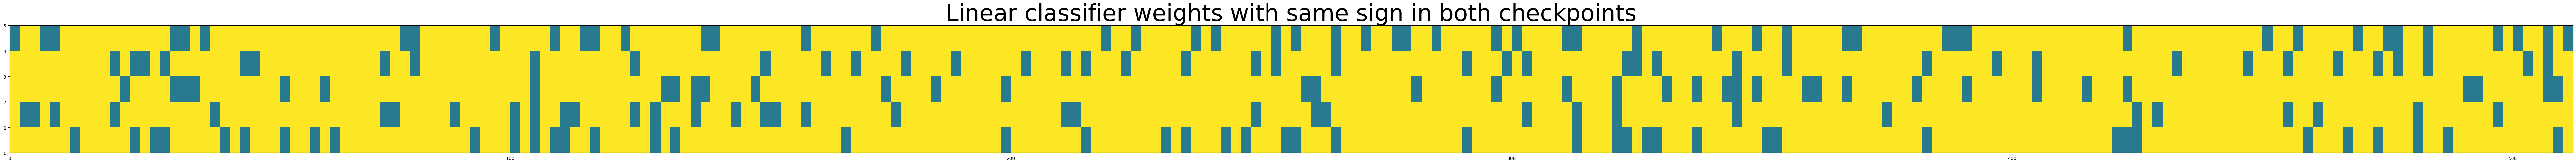

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(100, 5))  # Adjust the size as needed
ax.imshow(eq_sign_mask.cpu().numpy(), aspect='auto', extent=[0, 512, 0, 5], vmin=vmin, vmax=vmax)
ax.set_title("Linear classifier weights with same sign in both checkpoints", fontsize=50)
plt.show()